Silhouette Score: 0.7016363864458608


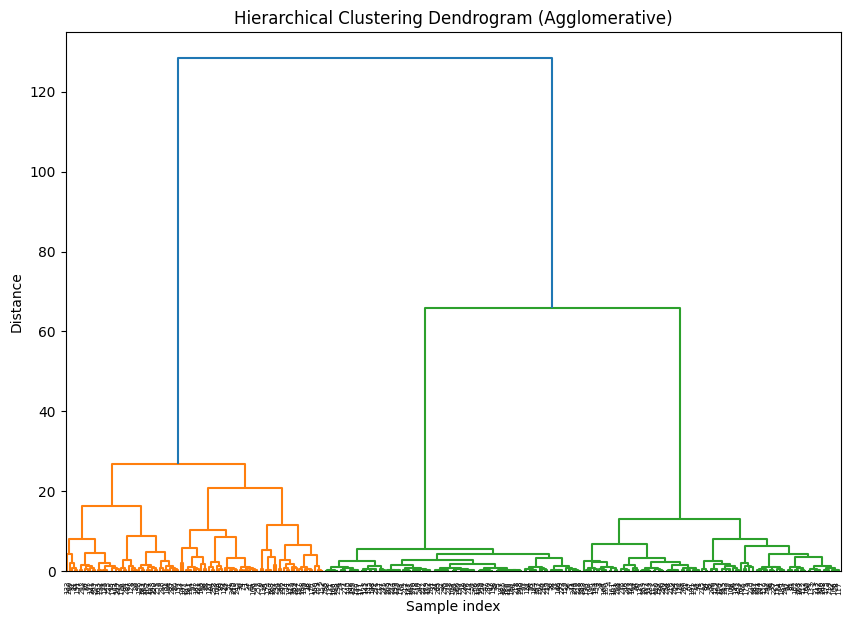

Silhouette Score: 0.6266738360611953
Estimated number of clusters: 1
Estimated number of noise points: 229


Silhouette Score: 0.4203959480508186


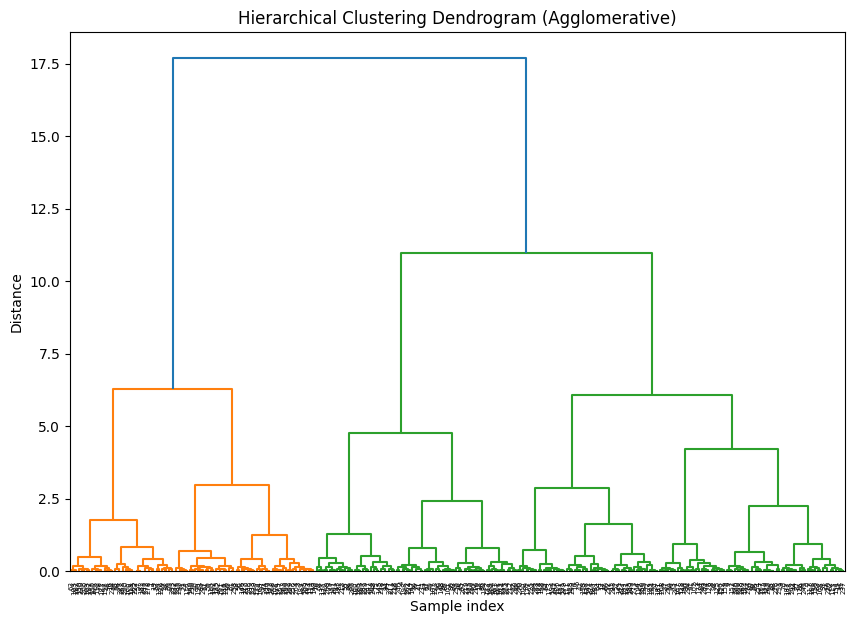

Silhouette Score: 0.41540436287726173
Estimated number of clusters: 2
Estimated number of noise points: 0


In [3]:
# Import packages
import numpy as np
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import plot_cluster_results as pcr

# Generate synthetic data
X, y = make_moons(n_samples=300, noise=0.05) 

# Train a k-Means clustering model
kmeans = KMeans(n_clusters=3, max_iter=15, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Evaluate the model
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clustering results using the custom function
centers = kmeans.cluster_centers_
#pcr.plot_clustering_results(X, y_kmeans, centers, silhouette_avg, n_clusters=4)

# Perform agglomerative clustering
Z = linkage(X, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Agglomerative)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Train an agglomerative clustering model
agg_clustering = AgglomerativeClustering(n_clusters=4)
y_agg = agg_clustering.fit_predict(X)

# Evaluate the model
silhouette_avg = silhouette_score(X, y_agg)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clustering results using the custom function
#pcr.plot_clustering_results(X, y_agg, None, silhouette_avg, n_clusters=4)

# Train a DBSCAN clustering model
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
